# LOAD DATA

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import entropy
from scipy.stats import zscore
from scipy.stats import uniform, loguniform

import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from urllib.parse import urlparse

# Load dataset
valid = pd.read_csv('Data Source/valid phising new.csv')
invalid = pd.read_csv('Data Source/invalid phising new.csv')

valid


,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8662956,https://aru4901.page.link/qbvQadded on Jul 18t...,by D3Lab,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8662952,https://supportsella.comadded on Jul 18th 2024...,by bbross,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8662946,https://aeoncadr.reaolmt-meswebs.xhlasa.net/ae...,by dms,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8662945,https://slmmonsxzv.site/Simmons/added on Jul 1...,by dms,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,8655638,https://shaw-101100.weeblysite.com/added on Ju...,by buaya,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5628,8655637,https://shaw-101117.weeblysite.com/added on Ju...,by buaya,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5629,8655636,https://shaw-101135.weeblysite.com/added on Ju...,by buaya,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5630,8655635,https://shaw-101161.weeblysite.com/added on Ju...,by buaya,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
invalid

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8654623,https://cloudflare-ipfs.orgadded on Jul 14th 2...,by Felix0101,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8637644,https://www.economist.com/added on Jul 2nd 202...,by Felix0101,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8632748,http://login.live.com.office.urgo-prod1.labora...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8632746,http://login.live.com.office.urgo-prod1.labora...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,7396044,https://e.cltrsp.com/added on Dec 27th 2021 2:...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5606,7396043,https://www.tennantpackaging.com/the-team.html...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5607,7396038,http://webmail.alugrama.com.mx/added on Dec 27...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5608,7396034,https://riklyd.com/?a=4029&oc=13409&c=38210&m=...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Kombinasi Data 
url_combine = pd.concat([valid,invalid])
url_combine

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8662956,https://aru4901.page.link/qbvQadded on Jul 18t...,by D3Lab,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8662952,https://supportsella.comadded on Jul 18th 2024...,by bbross,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8662946,https://aeoncadr.reaolmt-meswebs.xhlasa.net/ae...,by dms,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8662945,https://slmmonsxzv.site/Simmons/added on Jul 1...,by dms,VALID PHISH,ONLINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,7396044,https://e.cltrsp.com/added on Dec 27th 2021 2:...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5606,7396043,https://www.tennantpackaging.com/the-team.html...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5607,7396038,http://webmail.alugrama.com.mx/added on Dec 27...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5608,7396034,https://riklyd.com/?a=4029&oc=13409&c=38210&m=...,by cleanmx,INVALID,Offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Simpan file 
url_combine.to_csv('Data Processing/url_combine.csv')

# PREPROCESSING DATA

## CLEANING

In [5]:
# Hapus index ke 5 - 19
data = url_combine.drop(url_combine.columns[4:20], axis=1)

# Hapus index ke 2
data = data.drop(url_combine.columns[2], axis=1)

# Hapus index ke 0
data = data.drop(url_combine.columns[0], axis=1)

In [6]:
# Ubah nama kolom
data.rename(columns={'Column 2': 'url', 'Column 4': 'label'}, inplace=True)

# Mengubah isi kolom label
data['label'] = data['label'].replace({'VALID PHISH': 'phishing', 'INVALID': 'non-phishing'})

data

,url,label
0,NaN,NaN
1,https://aru4901.page.link/qbvQadded on Jul 18t...,phishing
2,https://supportsella.comadded on Jul 18th 2024...,phishing
3,https://aeoncadr.reaolmt-meswebs.xhlasa.net/ae...,phishing
4,https://slmmonsxzv.site/Simmons/added on Jul 1...,phishing
...,...,...
5605,https://e.cltrsp.com/added on Dec 27th 2021 2:...,non-phishing
5606,https://www.tennantpackaging.com/the-team.html...,non-phishing
5607,http://webmail.alugrama.com.mx/added on Dec 27...,non-phishing
5608,https://riklyd.com/?a=4029&oc=13409&c=38210&m=...,non-phishing


In [7]:
def clean_url(url):
    if isinstance(url, str):  # Ensure url is a string
        # Remove text after a specific date format and time
        url = re.sub(r' on \w{3} \d{1,2}(st|nd|rd|th) \d{4} \d{1,2}:\d{2} [APM]{2}', '', url)
        
        # Remove 'added' or '...added' from the URL
        url = url.replace('...added', '')
        url = url.replace('added', '')
    
    return url

# Apply the cleaning function to the 'url' column
data['url'] = data['url'].apply(clean_url)

# Check missing values
print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Drop duplicates based on the 'url' column
data = data.drop_duplicates(subset=['url'])

# Display the cleaned data
print(data)


url      1022
label    1022
dtype: int64
                                                    url         label
1                        https://aru4901.page.link/qbvQ      phishing
2                              https://supportsella.com      phishing
3      https://aeoncadr.reaolmt-meswebs.xhlasa.net/aeon      phishing
4                      https://slmmonsxzv.site/Simmons/      phishing
5     https://docs.google.com/presentation/d/e/2PACX...      phishing
...                                                 ...           ...
5604                             https://bit.ly/3FdUlyW  non-phishing
5605                              https://e.cltrsp.com/  non-phishing
5606     https://www.tennantpackaging.com/the-team.html  non-phishing
5607                    http://webmail.alugrama.com.mx/  non-phishing
5608  https://riklyd.com/?a=4029&oc=13409&c=38210&m=...  non-phishing

[9736 rows x 2 columns]


In [8]:
# Simpan file 
data.to_csv('Data Processing/url_combine_cleaned.csv')
data

,url,label
1,https://aru4901.page.link/qbvQ,phishing
2,https://supportsella.com,phishing
3,https://aeoncadr.reaolmt-meswebs.xhlasa.net/aeon,phishing
4,https://slmmonsxzv.site/Simmons/,phishing
5,https://docs.google.com/presentation/d/e/2PACX...,phishing
...,...,...
5604,https://bit.ly/3FdUlyW,non-phishing
5605,https://e.cltrsp.com/,non-phishing
5606,https://www.tennantpackaging.com/the-team.html,non-phishing
5607,http://webmail.alugrama.com.mx/,non-phishing


## TRANSFORM

In [9]:
def calculate_entropy(s):
    # Calculate entropy of the string
    probabilities = [float(s.count(c)) / len(s) for c in set(s)]
    return entropy(probabilities)

def add_features(data):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    data = data.copy()

    # 1. URL_Length
    data.loc[:, 'URL_Length'] = data['url'].apply(len)

    # 2. Shortening_Service
    shortening_services = ['bit.ly', 't.co', 'tinyurl.com', 'goo.gl', 'is.gd']
    data.loc[:, 'Shortening_Service'] = data['url'].apply(lambda x: 1 if any(service in x for service in shortening_services) else 0)

    # 3. Having_At_Symbol
    data.loc[:, 'Having_At_Symbol'] = data['url'].apply(lambda x: x.count('@'))

    # 4. Double_slash_redirecting
    data.loc[:, 'Double_slash_redirecting'] = data['url'].apply(lambda x: x.count('//'))

    # 5. Prefix_Suffix
    data.loc[:, 'Prefix_Suffix'] = data['url'].apply(lambda x: x.count('-'))

    # 6. Subdomain_Count
    data.loc[:, 'Subdomain_Count'] = data['url'].apply(lambda x: urlparse(x).netloc.count('.') - 1)

    # 7. HTTPS_token
    data.loc[:, 'HTTPS_token'] = data['url'].apply(lambda x: 1 if urlparse(x).scheme == 'https' else 0)

    # 8. Number_of_Parameters
    data.loc[:, 'Number_of_Parameters'] = data['url'].apply(lambda x: len(urlparse(x).query.split('&')))

    # 9. Number_of_Dots
    data.loc[:, 'Number_of_Dots'] = data['url'].apply(lambda x: urlparse(x).netloc.count('.'))

    # 10. Length_of_Domain
    data.loc[:, 'Length_of_Domain'] = data['url'].apply(lambda x: len(urlparse(x).netloc))

    # 11. Number_of_Digits
    data.loc[:, 'Number_of_Digits'] = data['url'].apply(lambda x: sum(c.isdigit() for c in x))

    # 12. Number_of_Underscores
    data.loc[:, 'Number_of_Underscores'] = data['url'].apply(lambda x: x.count('_'))

    # 13. Number_of_Special_Characters
    special_chars = "!#$%^&*()[]{};:,/<>?\\|`~-=+"
    data.loc[:, 'Number_of_Special_Characters'] = data['url'].apply(lambda x: sum(c in special_chars for c in x))

    # 14. Number_of_Letters
    data.loc[:, 'Number_of_Letters'] = data['url'].apply(lambda x: sum(c.isalpha() for c in x))

    # 15. Query_Length
    data.loc[:, 'Query_Length'] = data['url'].apply(lambda x: len(urlparse(x).query))

    # 16. Hostname_Length
    data.loc[:, 'Hostname_Length'] = data['url'].apply(lambda x: len(urlparse(x).hostname) if urlparse(x).hostname else 0)

    # 17. Length_of_Top_Level_Domain
    data.loc[:, 'Length_of_Top_Level_Domain'] = data['url'].apply(lambda x: len(urlparse(x).netloc.split('.')[-1]))

    # 18. Path_Depth
    data.loc[:, 'Path_Depth'] = data['url'].apply(lambda x: len(urlparse(x).path.strip('/').split('/')))

    # 19. Entropy_of_URL
    data.loc[:, 'Entropy_of_URL'] = data['url'].apply(calculate_entropy)

    # 20. URL_Contains_IP_Address
    data.loc[:, 'URL_Contains_IP_Address'] = data['url'].apply(lambda x: 1 if re.search(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', x) else 0)

    # 21. URL_Contains_Encoded_Characters
    data.loc[:, 'URL_Contains_Encoded_Characters'] = data['url'].apply(lambda x: 1 if '%' in x else 0)

    return data
data = add_features(data)

In [10]:
# Cek nama kolom
cols = data.columns.tolist()
cols

['url',
 'label',
 'URL_Length',
 'Shortening_Service',
 'Having_At_Symbol',
 'Double_slash_redirecting',
 'Prefix_Suffix',
 'Subdomain_Count',
 'HTTPS_token',
 'Number_of_Parameters',
 'Number_of_Dots',
 'Length_of_Domain',
 'Number_of_Digits',
 'Number_of_Underscores',
 'Number_of_Special_Characters',
 'Number_of_Letters',
 'Query_Length',
 'Hostname_Length',
 'Length_of_Top_Level_Domain',
 'Path_Depth',
 'Entropy_of_URL',
 'URL_Contains_IP_Address',
 'URL_Contains_Encoded_Characters']

In [11]:
# Cek nama kolom
cols = data.columns.tolist()

# Ubah posisi kolom label jadi kolom terakhir
cols.remove('label')
cols.append('label')

# Menyusun ulang kolom
data = data[cols]

# Menghapus kolom URL dan menyimpan URL untuk evaluasi
urls = data['url']
# data = data.drop(['url'], axis=1)

data

,url,URL_Length,Shortening_Service,Having_At_Symbol,Double_slash_redirecting,Prefix_Suffix,Subdomain_Count,HTTPS_token,Number_of_Parameters,Number_of_Dots,...,Number_of_Special_Characters,Number_of_Letters,Query_Length,Hostname_Length,Length_of_Top_Level_Domain,Path_Depth,Entropy_of_URL,URL_Contains_IP_Address,URL_Contains_Encoded_Characters,label
1,https://aru4901.page.link/qbvQ,30,0,0,1,0,1,1,1,2,...,4,20,0,17,4,1,3.106497,0,0,phishing
2,https://supportsella.com,24,0,0,1,0,0,1,1,1,...,3,20,0,16,3,1,2.592787,0,0,phishing
3,https://aeoncadr.reaolmt-meswebs.xhlasa.net/aeon,48,0,0,1,1,2,1,1,3,...,5,40,0,35,3,1,2.802034,0,0,phishing
4,https://slmmonsxzv.site/Simmons/,32,0,0,1,0,0,1,1,1,...,5,26,0,15,4,1,2.634728,0,0,phishing
5,https://docs.google.com/presentation/d/e/2PACX...,70,0,0,1,1,1,1,1,2,...,8,56,0,15,3,4,3.278947,0,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,https://bit.ly/3FdUlyW,22,1,0,1,0,0,1,1,1,...,4,16,0,6,2,1,2.665394,0,0,non-phishing
5605,https://e.cltrsp.com/,21,0,0,1,0,1,1,1,2,...,4,15,0,12,3,1,2.466577,0,0,non-phishing
5606,https://www.tennantpackaging.com/the-team.html,46,0,0,1,1,1,1,1,2,...,5,38,0,24,3,1,2.771128,0,0,non-phishing
5607,http://webmail.alugrama.com.mx/,31,0,0,1,0,2,0,1,3,...,4,24,0,23,2,1,2.774161,0,0,non-phishing


In [12]:
# Simpan file 
data.to_csv('Data Processing/url_transformed.csv')
data

,url,URL_Length,Shortening_Service,Having_At_Symbol,Double_slash_redirecting,Prefix_Suffix,Subdomain_Count,HTTPS_token,Number_of_Parameters,Number_of_Dots,...,Number_of_Special_Characters,Number_of_Letters,Query_Length,Hostname_Length,Length_of_Top_Level_Domain,Path_Depth,Entropy_of_URL,URL_Contains_IP_Address,URL_Contains_Encoded_Characters,label
1,https://aru4901.page.link/qbvQ,30,0,0,1,0,1,1,1,2,...,4,20,0,17,4,1,3.106497,0,0,phishing
2,https://supportsella.com,24,0,0,1,0,0,1,1,1,...,3,20,0,16,3,1,2.592787,0,0,phishing
3,https://aeoncadr.reaolmt-meswebs.xhlasa.net/aeon,48,0,0,1,1,2,1,1,3,...,5,40,0,35,3,1,2.802034,0,0,phishing
4,https://slmmonsxzv.site/Simmons/,32,0,0,1,0,0,1,1,1,...,5,26,0,15,4,1,2.634728,0,0,phishing
5,https://docs.google.com/presentation/d/e/2PACX...,70,0,0,1,1,1,1,1,2,...,8,56,0,15,3,4,3.278947,0,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,https://bit.ly/3FdUlyW,22,1,0,1,0,0,1,1,1,...,4,16,0,6,2,1,2.665394,0,0,non-phishing
5605,https://e.cltrsp.com/,21,0,0,1,0,1,1,1,2,...,4,15,0,12,3,1,2.466577,0,0,non-phishing
5606,https://www.tennantpackaging.com/the-team.html,46,0,0,1,1,1,1,1,2,...,5,38,0,24,3,1,2.771128,0,0,non-phishing
5607,http://webmail.alugrama.com.mx/,31,0,0,1,0,2,0,1,3,...,4,24,0,23,2,1,2.774161,0,0,non-phishing


In [13]:
# Load the data from the CSV file
data = pd.read_csv('Data Processing/url_transformed.csv', index_col=0)

# Memeriksa apakah ada nilai yang hilang (NA) dalam DataFrame
missing_values = data.isna().sum()

# Menampilkan fitur-fitur yang memiliki nilai yang hilang
features_with_missing_values = missing_values[missing_values > 0]
if not features_with_missing_values.empty:
    print("Fitur-fitur dengan nilai yang hilang:")
    print(features_with_missing_values)
else:
    print("Tidak ada fitur dengan nilai yang hilang dalam data.")

# Memeriksa duplikasi dalam DataFrame
duplicated_rows = data[data.duplicated()]

# Jika ada baris yang terduplikasi, tampilkan informasinya
if not duplicated_rows.empty:
    print("Duplikasi dalam data:")
    print(duplicated_rows)
else:
    print("Tidak ada duplikasi dalam data.")

data

Tidak ada fitur dengan nilai yang hilang dalam data.
Tidak ada duplikasi dalam data.


,url,URL_Length,Shortening_Service,Having_At_Symbol,Double_slash_redirecting,Prefix_Suffix,Subdomain_Count,HTTPS_token,Number_of_Parameters,Number_of_Dots,...,Number_of_Special_Characters,Number_of_Letters,Query_Length,Hostname_Length,Length_of_Top_Level_Domain,Path_Depth,Entropy_of_URL,URL_Contains_IP_Address,URL_Contains_Encoded_Characters,label
1,https://aru4901.page.link/qbvQ,30,0,0,1,0,1,1,1,2,...,4,20,0,17,4,1,3.106497,0,0,phishing
2,https://supportsella.com,24,0,0,1,0,0,1,1,1,...,3,20,0,16,3,1,2.592787,0,0,phishing
3,https://aeoncadr.reaolmt-meswebs.xhlasa.net/aeon,48,0,0,1,1,2,1,1,3,...,5,40,0,35,3,1,2.802034,0,0,phishing
4,https://slmmonsxzv.site/Simmons/,32,0,0,1,0,0,1,1,1,...,5,26,0,15,4,1,2.634728,0,0,phishing
5,https://docs.google.com/presentation/d/e/2PACX...,70,0,0,1,1,1,1,1,2,...,8,56,0,15,3,4,3.278947,0,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,https://bit.ly/3FdUlyW,22,1,0,1,0,0,1,1,1,...,4,16,0,6,2,1,2.665394,0,0,non-phishing
5605,https://e.cltrsp.com/,21,0,0,1,0,1,1,1,2,...,4,15,0,12,3,1,2.466577,0,0,non-phishing
5606,https://www.tennantpackaging.com/the-team.html,46,0,0,1,1,1,1,1,2,...,5,38,0,24,3,1,2.771128,0,0,non-phishing
5607,http://webmail.alugrama.com.mx/,31,0,0,1,0,2,0,1,3,...,4,24,0,23,2,1,2.774161,0,0,non-phishing


## SELECTION

In [14]:
import hashlib
# Fungsi untuk menghasilkan hash SHA-256 dan mengonversi ke integer
def hash_sha256_to_int(url):
    # Hash SHA-256
    sha256_hash = hashlib.sha256(url.encode()).hexdigest()
    # Konversi hexadecimal ke integer
    hash_int = int(sha256_hash, 16)
    # Mengambil nilai integer yang lebih kecil jika terlalu besar dan Mengambil 10 digit terakhir untuk ukuran lebih kecil
    return hash_int % (10**10)

# Convert the 'url' feature to integer using hash()
data['url'] = data['url'].apply(lambda x: hash_sha256_to_int(x))

# Separate features and labels
X = data.drop('label', axis=1)
y = data['label']

X,y

(             url  URL_Length  Shortening_Service  Having_At_Symbol  \
 1      145367716          30                   0                 0   
 2     3738579749          24                   0                 0   
 3     8333000285          48                   0                 0   
 4      738624788          32                   0                 0   
 5     7831031621          70                   0                 0   
 ...          ...         ...                 ...               ...   
 5604  5740749717          22                   1                 0   
 5605  6134920495          21                   0                 0   
 5606  5338274760          46                   0                 0   
 5607  2121458407          31                   0                 0   
 5608  9469757198          54                   0                 0   
 
       Double_slash_redirecting  Prefix_Suffix  Subdomain_Count  HTTPS_token  \
 1                            1              0                1   

In [15]:
print(data['label'].value_counts())

label
phishing        4946
non-phishing    4790
Name: count, dtype: int64


# MEMBUAT MODEL SVM

## SPLIT 50 : 50

In [16]:
# Split data jadi data training dan data testing 50% - 50%
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

X_train = X_train1
X_test = X_test1
y_train = y_train1
y_test = y_test1

print(X_train.shape, X_test.shape)


(4868, 22) (4868, 22)


In [17]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define a narrower parameter distribution for faster exploration
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1), 
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=2,  # Reduced number of folds
    n_iter=10,  # Reduced number of iterations
    n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.814297   
6  {'C': 0.35498788321965025, 'gamma': 0.00817949...         0.733566   
2  {'C': 0.2937538457632829, 'gamma': 0.001493656...         0.732539   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.730896   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.729663   

   std_test_score  rank_test_score  
0        0.004108                1  
6        0.000205                2  
2        0.000411                3  
8        0.001643                4  
5        0.001643                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [18]:
# Initialize the SVM model with the best parameters
best_svm_model1 = SVC(**best_params, random_state=42, probability=True)

# Train the model
best_svm_model1.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model1.predict(X_test)

# Evaluate the model
train_score = best_svm_model1.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.97%
SVM Model Testing Score: 83.63%

              precision    recall  f1-score   support

non-phishing       0.80      0.88      0.84      2339
    phishing       0.88      0.80      0.84      2529

    accuracy                           0.84      4868
   macro avg       0.84      0.84      0.84      4868
weighted avg       0.84      0.84      0.84      4868



## SPLIT 55 : 45

In [19]:
# Split data jadi data training dan data testing 55% - 45%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.45, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)


X_train = X_train2
X_test = X_test2
y_train = y_train2
y_test = y_test2

print(X_train.shape, X_test.shape)


(5354, 22) (4382, 22)


In [20]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define a narrower parameter distribution for faster exploration
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1), 
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=2,  # Reduced number of folds
    n_iter=10,  # Reduced number of iterations
    n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.815092   
6  {'C': 0.35498788321965025, 'gamma': 0.00817949...         0.729922   
2  {'C': 0.2937538457632829, 'gamma': 0.001493656...         0.729174   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.728801   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.728614   

   std_test_score  rank_test_score  
0        0.003362                1  
6        0.007097                2  
2        0.006350                3  
5        0.006724                4  
8        0.006537                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [21]:
# Initialize the SVM model with the best parameters
best_svm_model2 = SVC(**best_params, random_state=42, probability=True)

# Train the model
best_svm_model2.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model2.predict(X_test)

# Evaluate the model
train_score = best_svm_model2.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.84%
SVM Model Testing Score: 83.77%

              precision    recall  f1-score   support

non-phishing       0.80      0.88      0.84      2083
    phishing       0.88      0.80      0.84      2299

    accuracy                           0.84      4382
   macro avg       0.84      0.84      0.84      4382
weighted avg       0.84      0.84      0.84      4382



## SPLIT 60 : 40

In [22]:
# Split data jadi data training dan data testing 60% - 40%
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)


X_train = X_train3
X_test = X_test3
y_train = y_train3
y_test = y_test3

print(X_train.shape, X_test.shape)


(5841, 22) (3895, 22)


In [23]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define a narrower parameter distribution for faster exploration
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1), 
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=2,  # Reduced number of folds
    n_iter=10,  # Reduced number of iterations
    n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.818524   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.729155   
6  {'C': 0.35498788321965025, 'gamma': 0.00817949...         0.728984   
1  {'C': 21.830968390524596, 'gamma': 0.061737703...         0.728813   
2  {'C': 0.2937538457632829, 'gamma': 0.001493656...         0.728299   

   std_test_score  rank_test_score  
0        0.003113                1  
8        0.004840                2  
6        0.005354                3  
1        0.004840                4  
2        0.005354                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [24]:
# Initialize the SVM model with the best parameters
best_svm_model3 = SVC(**best_params, random_state=42, probability=True)

# Train the model
best_svm_model3.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model3.predict(X_test)

# Evaluate the model
train_score = best_svm_model3.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.87%
SVM Model Testing Score: 83.67%

              precision    recall  f1-score   support

non-phishing       0.80      0.88      0.84      1855
    phishing       0.88      0.80      0.84      2040

    accuracy                           0.84      3895
   macro avg       0.84      0.84      0.84      3895
weighted avg       0.84      0.84      0.84      3895



## SPLIT 65 : 35

In [25]:
# Split data jadi data training dan data testing 65% - 35%
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.35, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)


X_train = X_train4
X_test = X_test4
y_train = y_train4
y_test = y_test4

print(X_train.shape, X_test.shape)


(6328, 22) (3408, 22)


In [26]:
# Initialize the SVM model
svm_model = SVC(random_state=42, probability=True)

# Define a narrower parameter distribution for faster exploration
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1), 
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=2,  # Reduced number of folds
    n_iter=10,  # Reduced number of iterations
    n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.821745   
1  {'C': 21.830968390524596, 'gamma': 0.061737703...         0.731985   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.731985   
6  {'C': 0.35498788321965025, 'gamma': 0.00817949...         0.731827   
9  {'C': 83.41930294140772, 'gamma': 0.0049924534...         0.731827   

   std_test_score  rank_test_score  
0        0.001264                1  
1        0.000632                2  
5        0.000316                2  
6        0.000474                4  
9        0.000474                4  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [27]:
# Initialize the SVM model with the best parameters
best_svm_model4 = SVC(**best_params, random_state=42)

# Train the model
best_svm_model4.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model4.predict(X_test)

# Evaluate the model
train_score = best_svm_model4.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.58%
SVM Model Testing Score: 84.04%

              precision    recall  f1-score   support

non-phishing       0.81      0.88      0.84      1632
    phishing       0.88      0.80      0.84      1776

    accuracy                           0.84      3408
   macro avg       0.84      0.84      0.84      3408
weighted avg       0.84      0.84      0.84      3408



## SPLIT 70 : 30

In [28]:
# Split data jadi data training dan data testing 70% - 30%
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)


X_train = X_train5
X_test = X_test5
y_train = y_train5
y_test = y_test5

print(X_train.shape, X_test.shape)


(6815, 22) (2921, 22)


In [29]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define a narrower parameter distribution for faster exploration
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1), 
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=2,  # Reduced number of folds
    n_iter=10,  # Reduced number of iterations
    n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.829200   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.732502   
1  {'C': 21.830968390524596, 'gamma': 0.061737703...         0.731915   
6  {'C': 0.35498788321965025, 'gamma': 0.00817949...         0.731768   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.731621   

   std_test_score  rank_test_score  
0        0.002960                1  
8        0.000479                2  
1        0.000186                3  
6        0.001213                4  
5        0.000480                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [30]:
# Initialize the SVM model with the best parameters
best_svm_model5 = SVC(**best_params, random_state=42, probability=True)

# Train the model
best_svm_model5.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model5.predict(X_test)

# Evaluate the model
train_score = best_svm_model5.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.49%
SVM Model Testing Score: 84.15%

              precision    recall  f1-score   support

non-phishing       0.81      0.87      0.84      1413
    phishing       0.87      0.81      0.84      1508

    accuracy                           0.84      2921
   macro avg       0.84      0.84      0.84      2921
weighted avg       0.84      0.84      0.84      2921



## SPLIT 75 : 25

In [31]:
#  Split data jadi data training dan data testing 75% - 25%
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train6 = scaler.fit_transform(X_train6)
X_test6 = scaler.transform(X_test6)

X_train = X_train6
X_test = X_test6
y_train = y_train6
y_test = y_test6

print(X_train.shape, X_test.shape)

(7302, 22) (2434, 22)


In [32]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define the parameter distribution for randomized search
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1),
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=3, n_iter=10, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.839770   
6  {'C': 0.35498788321965025, 'gamma': 0.00817949...         0.730348   
1  {'C': 21.830968390524596, 'gamma': 0.061737703...         0.730074   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.730074   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.729800   

   std_test_score  rank_test_score  
0        0.003019                1  
6        0.003044                2  
1        0.002746                3  
8        0.002746                3  
5        0.002732                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [33]:
# Initialize the SVM model with the best parameters
best_svm_model6 = SVC(**best_params, random_state=42)

# Train the model
best_svm_model6.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model6.predict(X_test)

# Evaluate the model
train_score = best_svm_model6.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.33%
SVM Model Testing Score: 84.26%

              precision    recall  f1-score   support

non-phishing       0.81      0.88      0.84      1172
    phishing       0.88      0.81      0.84      1262

    accuracy                           0.84      2434
   macro avg       0.84      0.84      0.84      2434
weighted avg       0.85      0.84      0.84      2434



## SPLIT 80 : 20

In [34]:
#  Split data jadi data training dan data testing 80% - 20%
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train7 = scaler.fit_transform(X_train7)
X_test7 = scaler.transform(X_test7)

X_train = X_train7
X_test = X_test7
y_train = y_train7
y_test = y_test7

print(X_train.shape, X_test.shape)

(7788, 22) (1948, 22)


In [35]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define the parameter distribution for randomized search
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1),
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=3, n_iter=10, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.840139   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.732666   
9  {'C': 83.41930294140772, 'gamma': 0.0049924534...         0.732666   
1  {'C': 21.830968390524596, 'gamma': 0.061737703...         0.732537   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.731895   

   std_test_score  rank_test_score  
0        0.006025                1  
5        0.003502                2  
9        0.003502                2  
1        0.003645                4  
8        0.003941                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [36]:
# Initialize the SVM model with the best parameters
best_svm_model7 = SVC(**best_params, random_state=42, probability=True)

# Train the model
best_svm_model7.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model7.predict(X_test)

# Evaluate the model
train_score = best_svm_model7.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.45%
SVM Model Testing Score: 83.98%

              precision    recall  f1-score   support

non-phishing       0.80      0.88      0.84       933
    phishing       0.88      0.80      0.84      1015

    accuracy                           0.84      1948
   macro avg       0.84      0.84      0.84      1948
weighted avg       0.84      0.84      0.84      1948



## SPLIT 85 : 15

In [37]:
#  Split data jadi data training dan data testing 85% - 15%
X_train8, X_test8, y_train8, y_test8 = train_test_split(X, y, test_size=0.15, random_state=82)

# Standardize the features
scaler = StandardScaler()
X_train8 = scaler.fit_transform(X_train8)
X_test8 = scaler.transform(X_test8)

X_train = X_train8
X_test = X_test8
y_train = y_train8
y_test = y_test8

print(X_train.shape, X_test.shape)

(8275, 22) (1461, 22)


In [38]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define the parameter distribution for randomized search
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1),
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=3, n_iter=10, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.838188   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.732932   
9  {'C': 83.41930294140772, 'gamma': 0.0049924534...         0.732932   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.732690   
1  {'C': 21.830968390524596, 'gamma': 0.061737703...         0.732690   

   std_test_score  rank_test_score  
0        0.004689                1  
5        0.006117                2  
9        0.006117                2  
8        0.006733                4  
1        0.006449                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [39]:
# Initialize the SVM model with the best parameters
best_svm_model8 = SVC(**best_params, random_state=42, probability=True)

# Train the model
best_svm_model8.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model8.predict(X_test)

# Evaluate the model
train_score = best_svm_model8.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.37%
SVM Model Testing Score: 84.46%

              precision    recall  f1-score   support

non-phishing       0.83      0.86      0.84       705
    phishing       0.86      0.83      0.85       756

    accuracy                           0.84      1461
   macro avg       0.84      0.85      0.84      1461
weighted avg       0.85      0.84      0.84      1461



## SPLIT 90 : 10

In [40]:
# Split data jadi data training dan data testing 90% - 10%
X_train9, X_test9, y_train9, y_test9 = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train9 = scaler.fit_transform(X_train9)
X_test9 = scaler.transform(X_test9)

X_train = X_train9
X_test = X_test9
y_train = y_train9
y_test = y_test9

print(X_train.shape, X_test.shape)

(8762, 22) (974, 22)


In [41]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Define the parameter distribution for randomized search
param_dist = {
    'C': loguniform(0.1, 100),
    'gamma': loguniform(0.001, 1),
    'kernel': ['rbf', 'linear']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_model, param_distributions=param_dist, scoring='accuracy', 
    cv=3, n_iter=10, n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Store the results in a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Select the relevant columns
results_table = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Sort the table by 'rank_test_score' in ascending order
sorted_results_table = results_table.sort_values(by='rank_test_score')

# Display the sorted results
print(sorted_results_table.head())

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


                                              params  mean_test_score  \
0  {'C': 1.3292918943162166, 'gamma': 0.711447600...         0.844441   
5  {'C': 65.41210527692726, 'gamma': 0.0010053940...         0.731568   
9  {'C': 83.41930294140772, 'gamma': 0.0049924534...         0.731568   
1  {'C': 21.830968390524596, 'gamma': 0.061737703...         0.731339   
8  {'C': 6.847920095574777, 'gamma': 0.0026210878...         0.730997   

   std_test_score  rank_test_score  
0        0.004651                1  
5        0.003885                2  
9        0.003885                2  
1        0.003919                4  
8        0.003648                5  
Best Parameters: {'C': np.float64(1.3292918943162166), 'gamma': np.float64(0.711447600934342), 'kernel': 'rbf'}


In [42]:
# Initialize the SVM model with the best parameters
best_svm_model9 = SVC(**best_params, random_state=42, probability=True)

# Train the model
best_svm_model9.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model9.predict(X_test)

# Evaluate the model
train_score = best_svm_model9.score(X_train, y_train) * 100
test_score = accuracy_score(y_test, y_pred) * 100

print(f"SVM Model Training Score: {train_score:.2f}%")
print(f"SVM Model Testing Score: {test_score:.2f}%")
print()
print(classification_report(y_test, y_pred, target_names=['non-phishing', 'phishing']))


SVM Model Training Score: 91.44%
SVM Model Testing Score: 83.26%

              precision    recall  f1-score   support

non-phishing       0.81      0.87      0.84       487
    phishing       0.86      0.80      0.83       487

    accuracy                           0.83       974
   macro avg       0.83      0.83      0.83       974
weighted avg       0.83      0.83      0.83       974



# PERBANDINGAN DATA

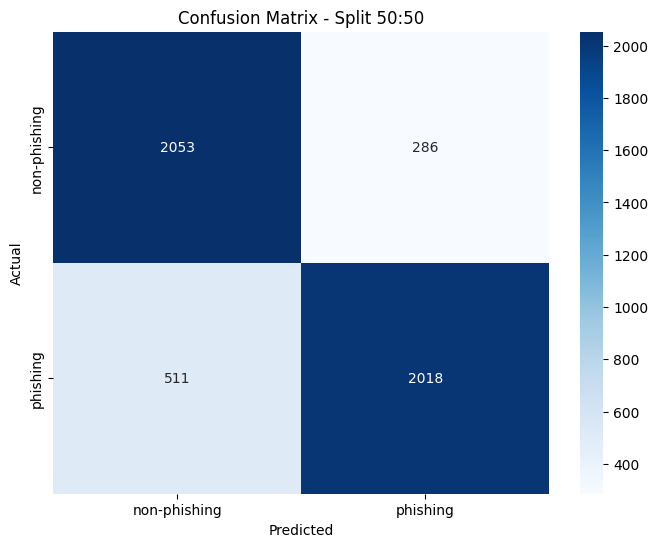

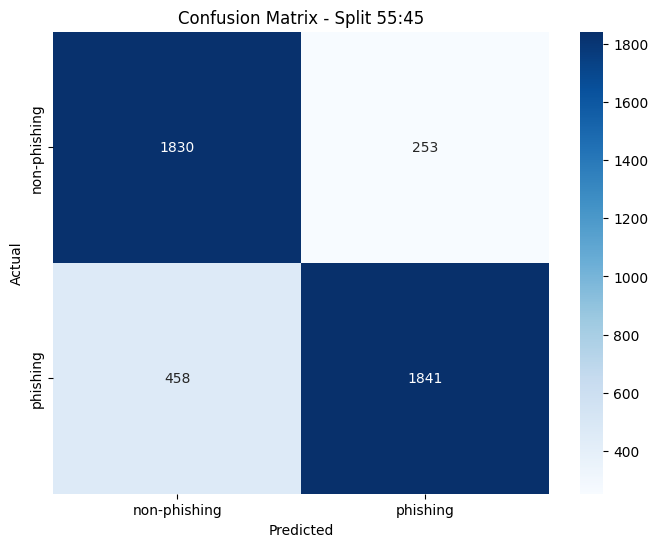

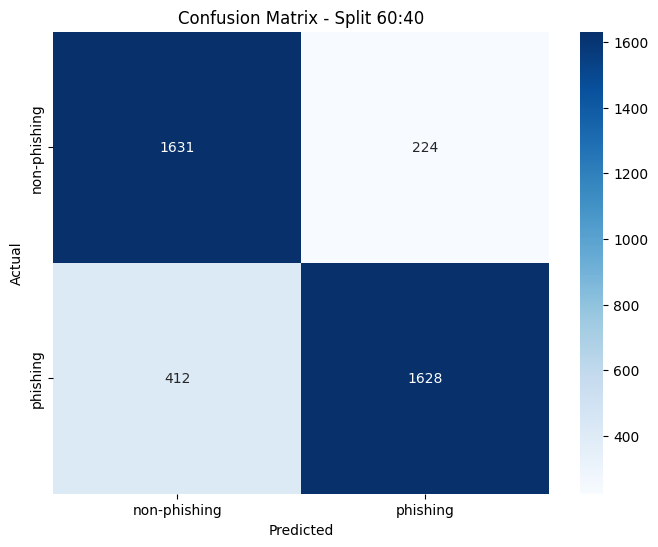

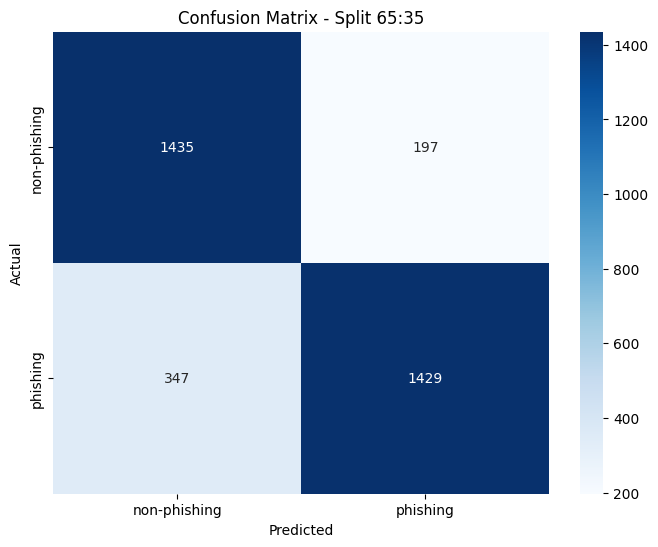

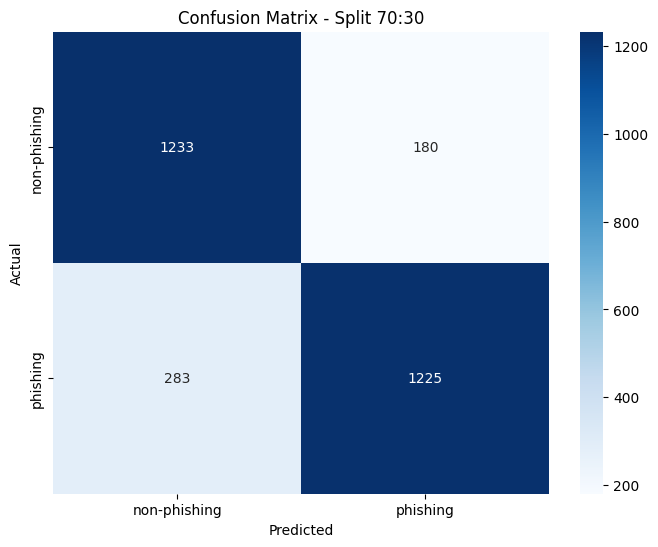

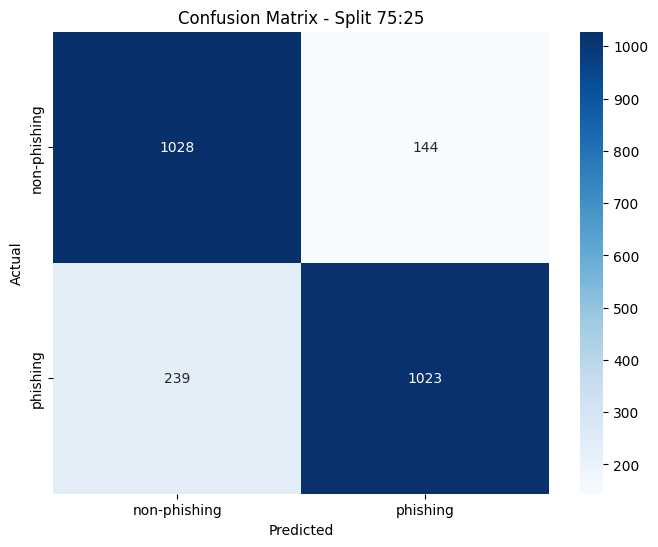

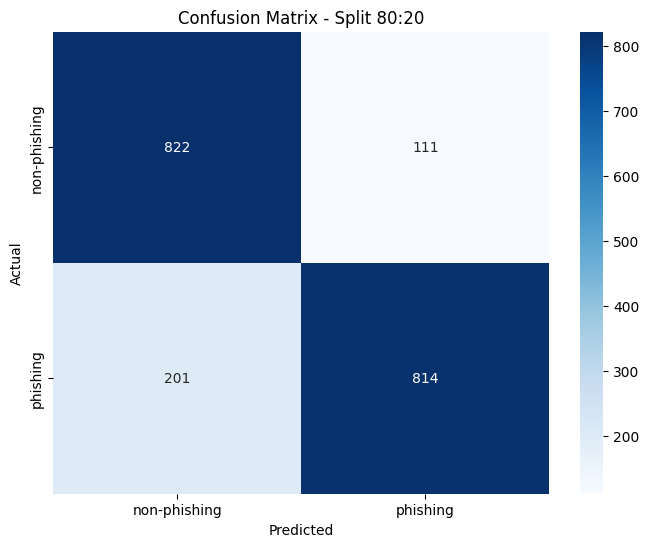

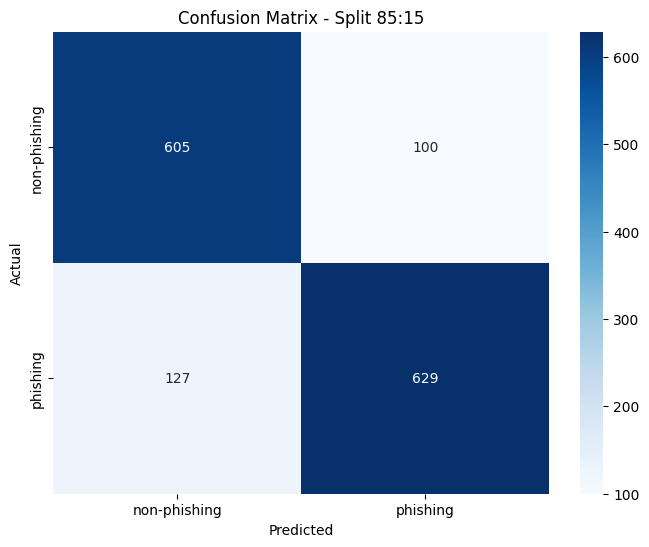

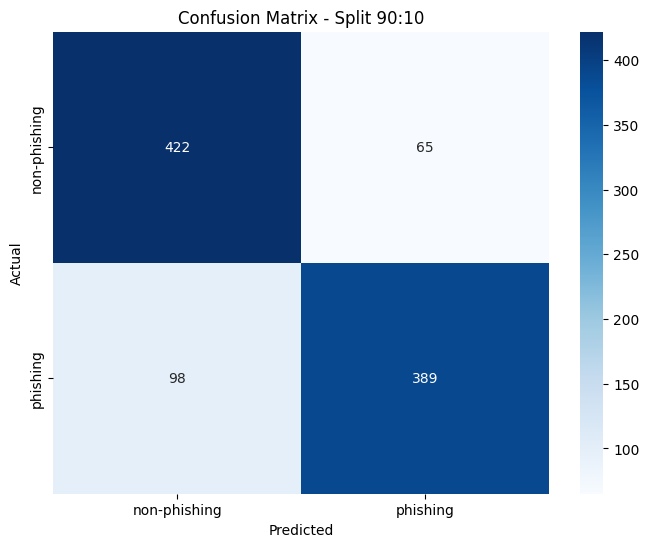

   Split  Accuracy Testing (%)  Accuracy Training (%)  \
7  85:15             84.462697              91.371601   
5  75:25             84.264585              91.331142   
4  70:30             84.149264              91.489362   
3  65:35             84.037559              91.577118   
6  80:20             83.983573              91.448382   
1  55:45             83.774532              91.837878   
2  60:40             83.671374              91.867831   
0  50:50             83.627773              91.967954   
8  90:10             83.264887              91.440310   

             Confusion Matrix  Precision    Recall  F1-score  Rank  
7    [[605, 100], [127, 629]]   0.862826  0.832011  0.847138   1.0  
5  [[1028, 144], [239, 1023]]   0.876607  0.810618  0.842322   2.0  
4  [[1233, 180], [283, 1225]]   0.871886  0.812334  0.841057   3.0  
3  [[1435, 197], [347, 1429]]   0.878844  0.804617  0.840094   4.0  
6    [[822, 111], [201, 814]]   0.880000  0.801970  0.839175   5.0  
1  [[1830, 253]

In [43]:
# Initialize the SVM model
best_svm_model = SVC(**best_params, random_state=42)

# Define train-test splits (excluding URLs)
train_test_splits = [
    (X_train1, X_test1, y_train1, y_test1, "50:50"),
    (X_train2, X_test2, y_train2, y_test2, "55:45"),
    (X_train3, X_test3, y_train3, y_test3, "60:40"),
    (X_train4, X_test4, y_train4, y_test4, "65:35"),
    (X_train5, X_test5, y_train5, y_test5, "70:30"),
    (X_train6, X_test6, y_train6, y_test6, "75:25"),
    (X_train7, X_test7, y_train7, y_test7, "80:20"),
    (X_train8, X_test8, y_train8, y_test8, "85:15"),
    (X_train9, X_test9, y_train9, y_test9, "90:10"),
]

# Initialize a list to store the results
results = []

# Loop through train-test splits
for X_train_split, X_test_split, y_train_split, y_test_split, split_name in train_test_splits:
    # Fit the model on the training data
    best_svm_model.fit(X_train_split, y_train_split)
    
    # Predict on the test data
    y_test_pred = best_svm_model.predict(X_test_split)

    # Predict on the training data for comparison
    y_train_pred = best_svm_model.predict(X_train_split)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test_split, y_test_pred)
    
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test_split, y_test_pred)
    precision = precision_score(y_test_split, y_test_pred, pos_label='phishing', average='binary')
    recall = recall_score(y_test_split, y_test_pred, pos_label='phishing', average='binary')
    f1 = f1_score(y_test_split, y_test_pred, pos_label='phishing', average='binary')
    
    # Convert to percentage
    accuracy_percentage_test = accuracy * 100

    # Calculate accuracy for training data
    accuracy_train = accuracy_score(y_train_split, y_train_pred)
    accuracy_percentage_train = accuracy_train * 100
    
    # Store the results in the list
    results.append({
        "Split": split_name,
        "Accuracy Testing (%)": accuracy_percentage_test,
        "Accuracy Training (%)": accuracy_percentage_train,
        "Confusion Matrix": conf_matrix,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['non-phishing', 'phishing'], yticklabels=['non-phishing', 'phishing'])
    plt.title(f'Confusion Matrix - Split {split_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create a DataFrame to display the summary results
results_df = pd.DataFrame(results)

# Add a ranking column based on the Accuracy
results_df['Rank'] = results_df['Accuracy Testing (%)'].rank(ascending=False)

# Sort the DataFrame by Rank
results_df_sorted = results_df.sort_values('Rank')

# Display the sorted results DataFrame
print(results_df_sorted)

# SIMPAN MODEL

In [44]:
# Kolom fitur yang digunakan untuk prediksi
feature_columns = X.columns

# Assume you have trained your model and have your data
accuracy = accuracy_score(y_test, best_svm_model8.predict(X_test))

# Simpan model dan scaler
with open('pkl/model.pkl', 'wb') as model_file:
    pickle.dump({
        'model': best_svm_model8,
        'scaler': scaler,
        'feature_columns': feature_columns,
        'accuracy': accuracy
    }, model_file)

# PREDIKSI DATA BARU

In [45]:
# Reload the model, scaler, and feature columns
with open('pkl/model.pkl', 'rb') as model_file:
    data = pickle.load(model_file)
    best_svm_model8 = data['model']
    scaler = data['scaler']
    feature_columns = data['feature_columns']
    accuracy = data['accuracy']

def hash_sha256_to_int(url):
    """Menghasilkan hash SHA-256 dari URL, mengonversi ke integer, dan mengembalikan nilai integer."""
    # Hash SHA-256
    sha256_hash = hashlib.sha256(url.encode()).hexdigest()
    # Konversi hexadecimal ke integer
    hash_int = int(sha256_hash, 16)
    # Mengambil nilai integer yang lebih kecil jika terlalu besar dan Mengambil 10 digit terakhir untuk ukuran lebih kecil
    return hash_int % (10**10)

# Fungsi untuk menghitung entropi string
def calculate_entropy(s):
    probabilities = [float(s.count(c)) / len(s) for c in set(s)]
    return entropy(probabilities)

# Function to extract features from a URL
def extract_features(url):
    # Define lists of keywords and services
    shortening_services = ['bit.ly', 'goo.gl', 'tinyurl.com', 'ow.ly', 'is.gd', 't.co']
    # malicious_words = ['malicious', 'phishing', 'fraud', 'secure', 'login', 'update', 'account', 'verify', 'bank']
    special_chars = "!#$%^&*()[]{};:,/<>?\\|`~-=+"
    # suspicious_tlds = ['xyz', 'club', 'tk', 'gq', 'cf']
    # suspicious_keywords_in_query = ['pwd', 'password', 'token']
    # malicious_words_in_path = ['admin', 'login', 'signup', 'register']
    
    parsed_url = urlparse(url)
    
    # Extract features
    features = {
        'url': hash_sha256_to_int(url),
        'URL_Length': len(url),
        'Shortening_Service': 1 if any(service in url for service in shortening_services) else 0,
        'Having_At_Symbol': url.count('@'),
        'Double_slash_redirecting': url.count('//'),
        'Prefix_Suffix': url.count('-'),
        'Subdomain_Count': parsed_url.netloc.count('.') - 1,
        'HTTPS_token': 1 if parsed_url.scheme == 'https' else 0,
        'Number_of_Parameters': len(parsed_url.query.split('&')),
        'Number_of_Dots': parsed_url.netloc.count('.'),
        'Length_of_Domain': len(parsed_url.netloc),
        'Number_of_Digits': sum(c.isdigit() for c in url),
        'Number_of_Underscores': url.count('_'),
        'Number_of_Special_Characters': sum(c in special_chars for c in url),
        'Number_of_Letters': sum(c.isalpha() for c in url),
        'Query_Length': len(parsed_url.query),
        'Hostname_Length': len(parsed_url.hostname) if parsed_url.hostname else 0,
        'Length_of_Top_Level_Domain': len(parsed_url.netloc.split('.')[-1]),
        'Path_Depth': len(parsed_url.path.strip('/').split('/')),
        'Entropy_of_URL': calculate_entropy(url),
        'URL_Contains_IP_Address': 1 if re.search(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', url) else 0,
        'URL_Contains_Encoded_Characters': 1 if '%' in url else 0,
    }
    print(f"Extracted features for URL: {features}")
    return features

# Fungsi untuk prediksi URL baru
def predict_new_url(url, best_svm_model1, scaler, feature_columns):
    """Prediksi apakah URL phishing atau tidak."""
    try:
        # Ekstraksi fitur
        features = extract_features(url)
        new_data = pd.DataFrame([features])
        
        # Reindex agar sesuai dengan kolom fitur yang diharapkan dan isi nilai yang hilang dengan 0
        new_data = new_data.reindex(columns=feature_columns, fill_value=0)
        
        # Skalakan data
        new_data_scaled = scaler.transform(new_data)
        prediction = best_svm_model1.predict(new_data_scaled)
        return prediction[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        print(f"Extracted features for URL: {features}")
        return None

# Use the reloaded model to predict new URLs
url_phishing = "https://notevocale202407.squarespace.com/home?utm_medium=social"
prediction_phishing = predict_new_url(url_phishing, best_svm_model1, scaler, feature_columns)
print(f'Prediction for phishing URL: {prediction_phishing} ({ "Website ini terindikasi berbahaya" if prediction_phishing == "phishing" else "Website ini tampaknya aman"})')

print("")

url_non_phishing = "https://www.aljazeera.com/news/2022/1/31/cyberattacks-on-us-schools-in"
prediction_non_phishing = predict_new_url(url_non_phishing, best_svm_model8, scaler, feature_columns)
print(f'Prediction for non-phishing URL: {prediction_non_phishing} ({"Website ini terindikasi berbahaya" if prediction_non_phishing == "phishing" else "Website ini tampaknya aman"})')


Extracted features for URL: {'url': 793347922, 'URL_Length': 63, 'Shortening_Service': 0, 'Having_At_Symbol': 0, 'Double_slash_redirecting': 1, 'Prefix_Suffix': 0, 'Subdomain_Count': 1, 'HTTPS_token': 1, 'Number_of_Parameters': 1, 'Number_of_Dots': 2, 'Length_of_Domain': 32, 'Number_of_Digits': 6, 'Number_of_Underscores': 1, 'Number_of_Special_Characters': 6, 'Number_of_Letters': 48, 'Query_Length': 17, 'Hostname_Length': 32, 'Length_of_Top_Level_Domain': 3, 'Path_Depth': 1, 'Entropy_of_URL': np.float64(3.106287425161764), 'URL_Contains_IP_Address': 0, 'URL_Contains_Encoded_Characters': 0}
Prediction for phishing URL: phishing (Website ini terindikasi berbahaya)

Extracted features for URL: {'url': 6226360311, 'URL_Length': 70, 'Shortening_Service': 0, 'Having_At_Symbol': 0, 'Double_slash_redirecting': 1, 'Prefix_Suffix': 4, 'Subdomain_Count': 1, 'HTTPS_token': 1, 'Number_of_Parameters': 1, 'Number_of_Dots': 2, 'Length_of_Domain': 17, 'Number_of_Digits': 7, 'Number_of_Underscores': 0, 

In [47]:
import numpy as np

# Matriks koefisien
A = np.array([
    [32, 0, 1, 1],
    [-17, -1, 0,-1],
    [37, 0, 0, 1],
    [-51, 0, 0, -1]
])

# Vektor hasil
b = np.array([1, 1, 1, 1])

# Menggunakan metode least squares
solution = np.linalg.lstsq(A, b, rcond=None)[0]

# Menampilkan hasil
w1, w2, w3, b = solution
print(f"w1: {w1}, w2: {w2}, w3: {w3}, b: {b}")

w1: -0.14285714285714293, w2: -4.857142857142857, w3: -0.7142857142857181, b: 6.285714285714284
